<a href="https://colab.research.google.com/github/vitorramon/BigData-Queimadas-Amazonas/blob/main/Projeto_Queimadas_Amaz%C3%B4nia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libs Necessárias

# Libs para Modelagem e Matrizes

import numpy as np
import pandas as pd

# Libs para análises gráficas

import matplotlib.pyplot as plt
import seaborn as sns

# Libs para ignorar avisos

import warnings

# Desabilitando avisos

warnings.filterwarnings('ignore')

In [ ]:
# Lendo os dados

Base_Dados = pd.read_csv('Dados_Incendio.csv', encoding='latin-1')

# Verificando
Base_Dados.head()

,DataHora,Satelite,Pais,Estado,Municipio,Bioma,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP
0,2023/01/02 17:15:00,AQUA_M-T,Brasil,AMAZONAS,ITACOATIARA,AmazÃ´nia,0,0.80,0.0,-3.29169,-58.65920,19.1
1,2023/01/02 17:30:00,NPP-375,Brasil,AMAZONAS,CANUTAMA,AmazÃ´nia,3,0.10,0.0,-8.76197,-64.16180,9.8
2,2023/01/02 17:30:00,NPP-375,Brasil,AMAZONAS,CANUTAMA,AmazÃ´nia,3,0.10,0.0,-8.76593,-64.16123,28.0
3,2023/01/03 18:00:00,AQUA_M-T,Brasil,AMAZONAS,FONTE BOA,AmazÃ´nia,1,2.23,-999.0,-2.51782,-66.09596,7.2
4,2023/01/03 18:00:00,NOAA-20,Brasil,AMAZONAS,APUÃ,AmazÃ´nia,2,8.26,0.0,-8.56682,-59.62691,0.7


In [ ]:
# Nulos

Base_Dados.isnull().sum()

DataHora          0
Satelite          0
Pais              0
Estado            0
Municipio         0
Bioma             0
DiaSemChuva       0
Precipitacao      0
RiscoFogo         1
Latitude          1
Longitude         1
FRP             741
dtype: int64

<Axes: title={'center': 'Análise de Campos Nulos'}>

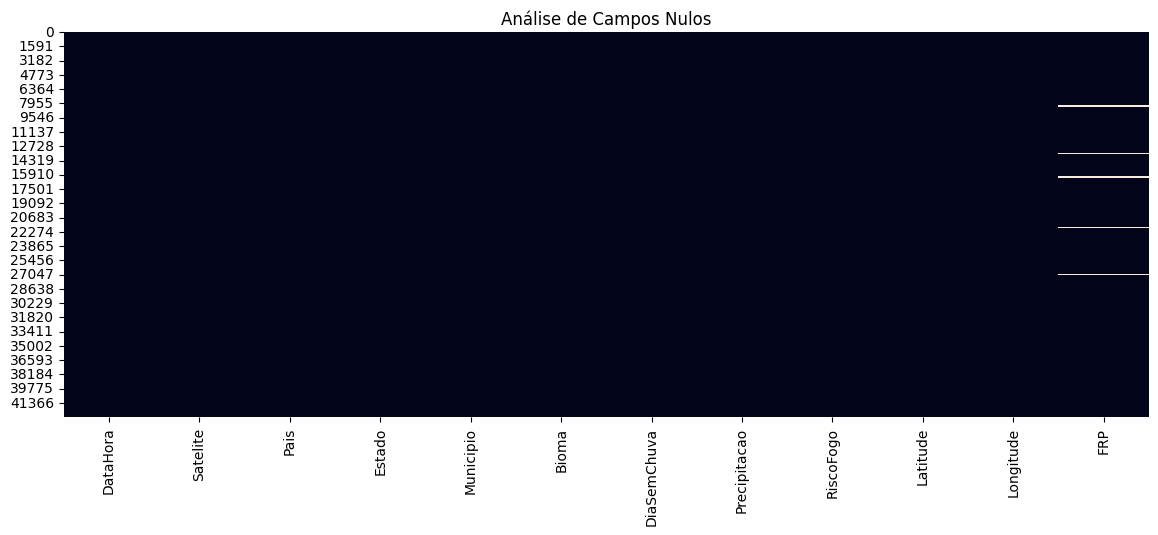

In [ ]:
# Nulos Plot

plt.figure( figsize=(14,5) )
plt.title('Análise de Campos Nulos')
sns.heatmap( Base_Dados.isnull(), cbar=False )

In [ ]:
# Estatíticas

Base_Dados.describe()

,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP
count,42946.000000,42946.000000,42945.000000,42945.000000,42945.000000,42205.000000
mean,5.665231,0.816804,-16.669592,-6.069613,-61.730971,47.692508
std,5.518723,3.722483,129.088814,2.259543,3.466282,91.596328
min,0.000000,0.000000,-999.000000,-9.778400,-73.173200,0.000000
25%,2.000000,0.000000,0.080000,-7.517600,-64.015370,5.000000
50%,4.000000,0.000000,0.260000,-6.854500,-60.164300,13.000000
75%,8.000000,0.000000,0.410000,-3.736120,-59.418600,63.100000
max,42.000000,78.530000,1.000000,1.942660,-56.118350,2095.000000


In [ ]:
# Info

Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42946 entries, 0 to 42945
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DataHora      42946 non-null  object 
 1   Satelite      42946 non-null  object 
 2   Pais          42946 non-null  object 
 3   Estado        42946 non-null  object 
 4   Municipio     42946 non-null  object 
 5   Bioma         42946 non-null  object 
 6   DiaSemChuva   42946 non-null  int64  
 7   Precipitacao  42946 non-null  float64
 8   RiscoFogo     42945 non-null  float64
 9   Latitude      42945 non-null  float64
 10  Longitude     42945 non-null  float64
 11  FRP           42205 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 3.9+ MB


In [ ]:
# Campo únicos

Base_Dados.nunique()

DataHora         6237
Satelite           15
Pais                1
Estado              1
Municipio          62
Bioma               1
DiaSemChuva        43
Precipitacao     1589
RiscoFogo         102
Latitude        29572
Longitude       30061
FRP              3069
dtype: int64

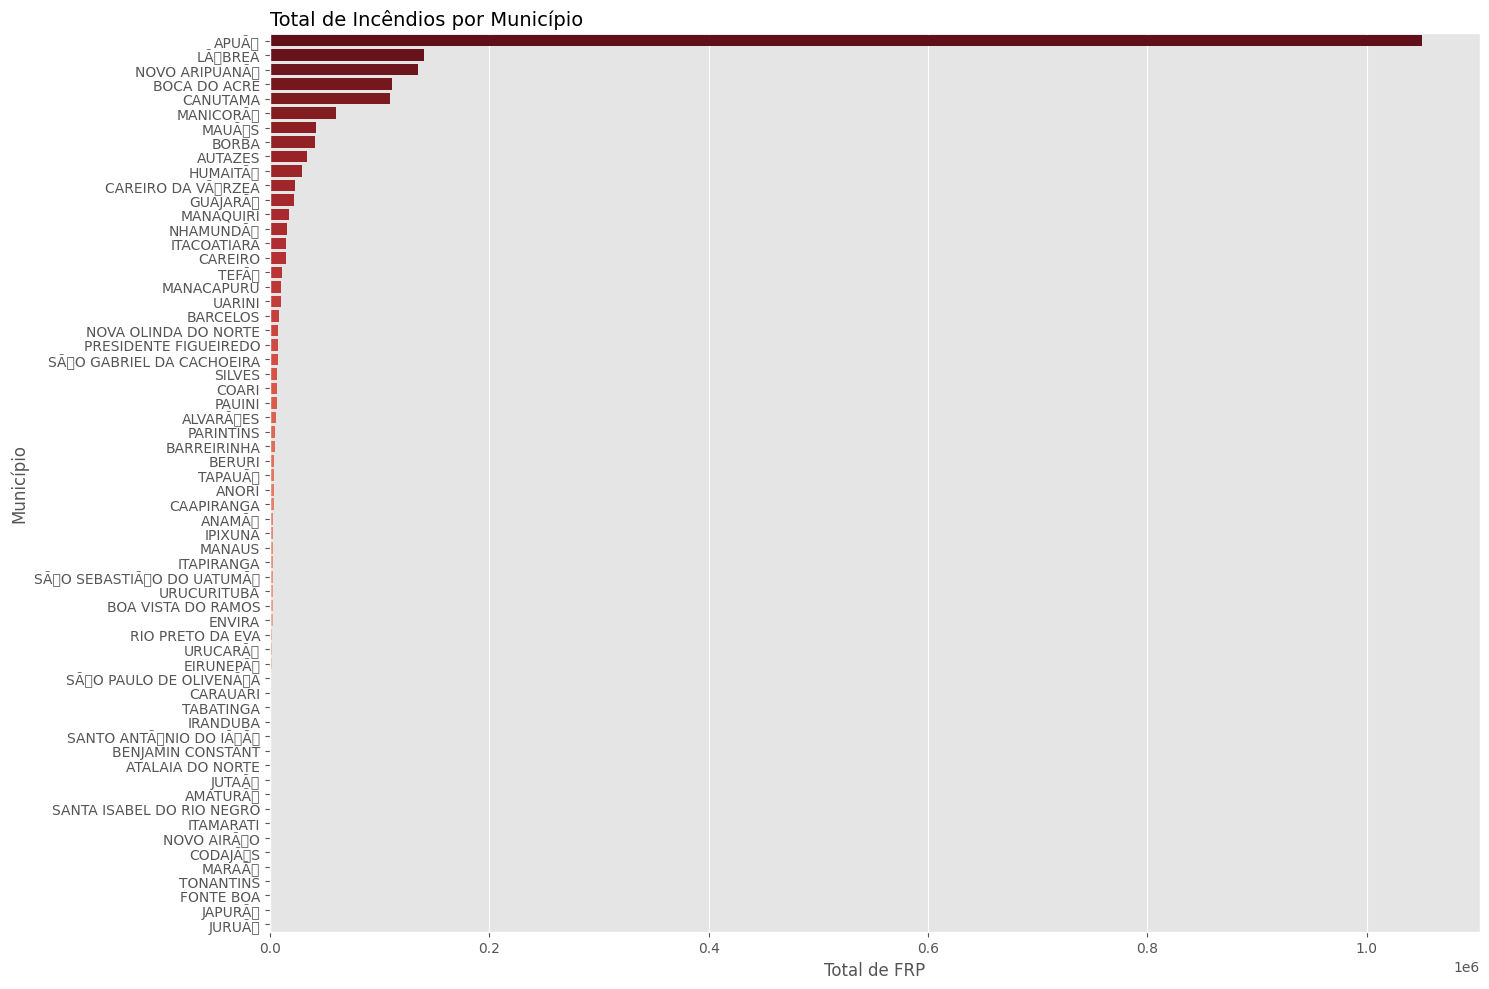

In [ ]:
# Agrupar dados por município e somar as colunas de interesse
analise = Base_Dados.groupby('Municipio')[['FRP']].sum().reset_index()

# Ordenar os dados para melhor visualização
analise = analise.sort_values(by='FRP', ascending=False)

# Tamanho da figura
plt.figure(figsize=(15, 10))

# Estilo do gráfico
plt.style.use('ggplot')

# Gráfico de barras
sns.barplot(x='FRP', y='Municipio', data=analise, palette='Reds_r')

# Título e labels
plt.title('Total de Incêndios por Município', loc='left', fontsize=14)
plt.xlabel('Total de FRP')
plt.ylabel('Município')

# Ajustar layout
plt.tight_layout()
plt.show()

In [ ]:
# Estatísticas descritivas dos campos de interesse
print(Base_Dados[['DiaSemChuva', 'Precipitacao', 'RiscoFogo', 'FRP']].describe())

        DiaSemChuva  Precipitacao     RiscoFogo           FRP
count  42946.000000  42946.000000  42945.000000  42205.000000
mean       5.665231      0.816804    -16.669592     47.692508
std        5.518723      3.722483    129.088814     91.596328
min        0.000000      0.000000   -999.000000      0.000000
25%        2.000000      0.000000      0.080000      5.000000
50%        4.000000      0.000000      0.260000     13.000000
75%        8.000000      0.000000      0.410000     63.100000
max       42.000000     78.530000      1.000000   2095.000000


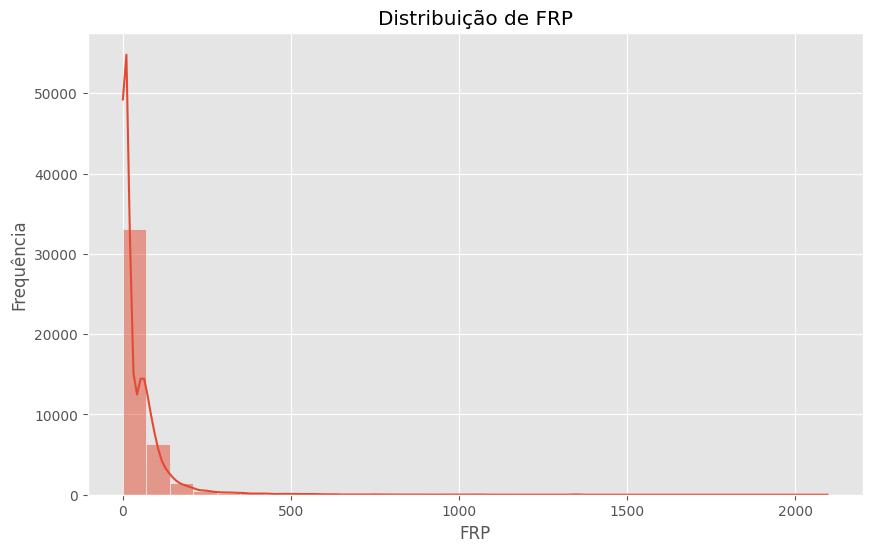

In [ ]:
# Histograma de FRP
plt.figure(figsize=(10, 6))
sns.histplot(Base_Dados['FRP'], kde=True, bins=30)
plt.title('Distribuição de FRP')
plt.xlabel('FRP')
plt.ylabel('Frequência')
plt.show()

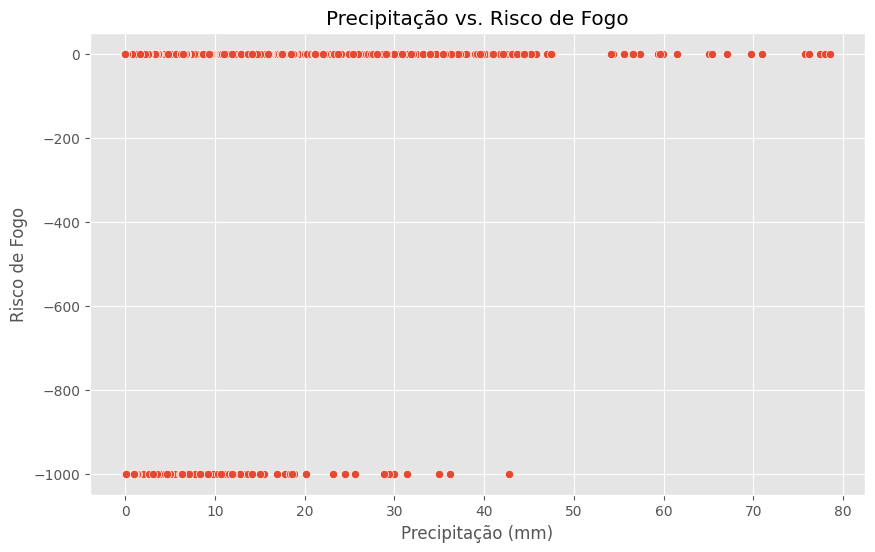

In [ ]:
# Gráfico de dispersão Precipitação vs. RiscoFogo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Precipitacao', y='RiscoFogo', data=Base_Dados)
plt.title('Precipitação vs. Risco de Fogo')
plt.xlabel('Precipitação (mm)')
plt.ylabel('Risco de Fogo')
plt.show()

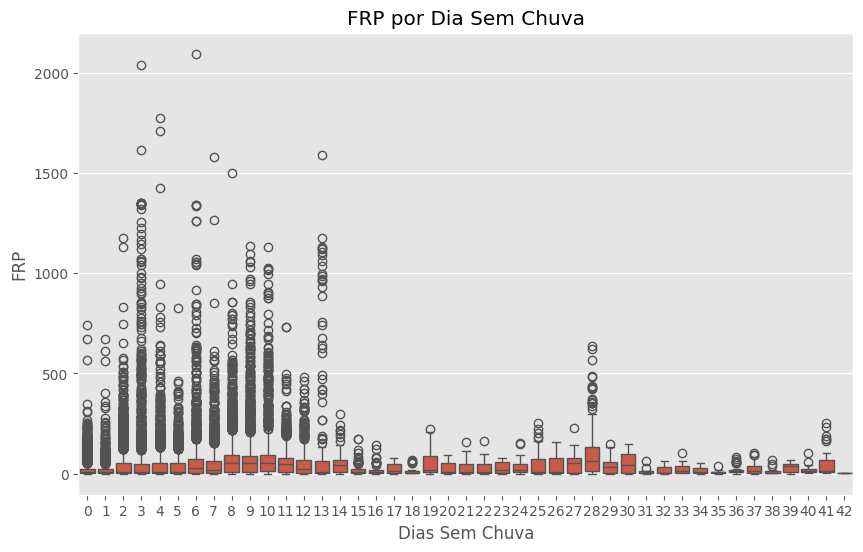

In [ ]:
# Boxplot de FRP por DiaSemChuva
plt.figure(figsize=(10, 6))
sns.boxplot(x='DiaSemChuva', y='FRP', data=Base_Dados)
plt.title('FRP por Dia Sem Chuva')
plt.xlabel('Dias Sem Chuva')
plt.ylabel('FRP')
plt.show()


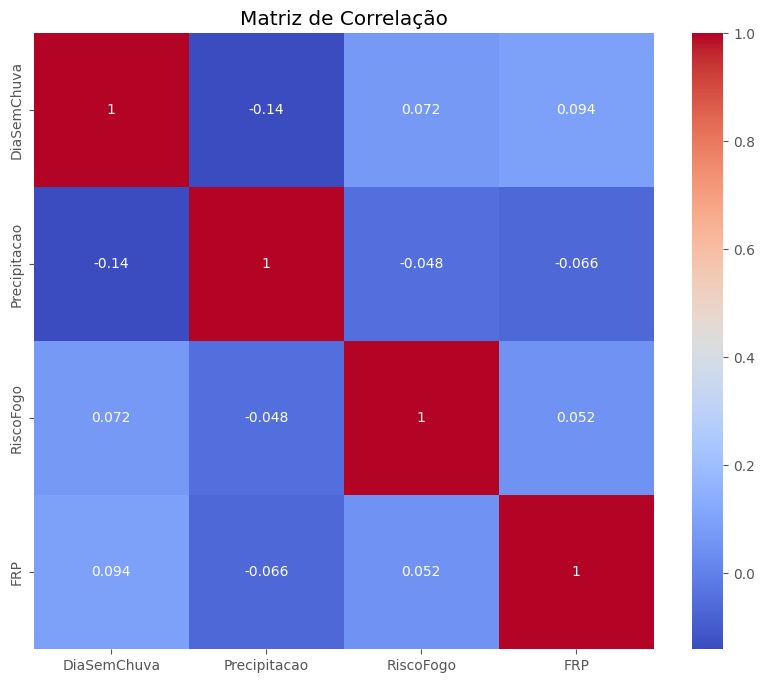

In [ ]:
# Matriz de correlação
plt.figure(figsize=(10, 8))
correlation_matrix = Base_Dados[['DiaSemChuva', 'Precipitacao', 'RiscoFogo', 'FRP']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

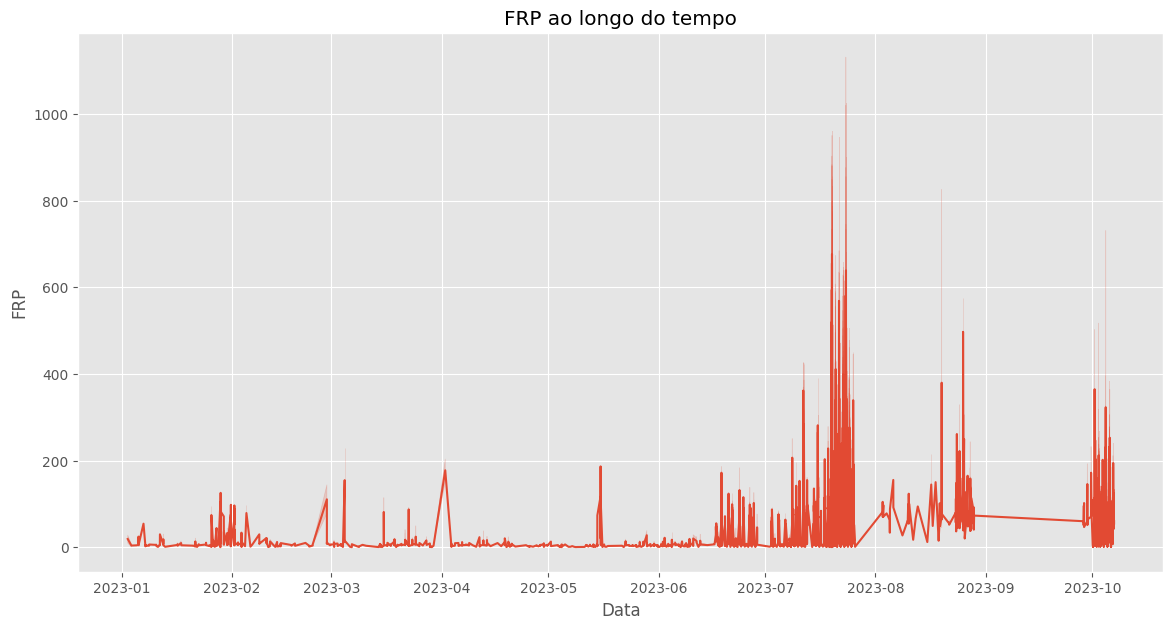

In [ ]:
# Converter a coluna DataHora para o tipo datetime
Base_Dados['DataHora'] = pd.to_datetime(Base_Dados['DataHora'])

# Plotar FRP ao longo do tempo
plt.figure(figsize=(14, 7))
sns.lineplot(x='DataHora', y='FRP', data=Base_Dados)
plt.title('FRP ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('FRP')
plt.show()


In [ ]:
# Filtrar para o município de Itacoatiara
Base_Dados_itacoatiara = Base_Dados[Base_Dados['Municipio'] == 'ITACOATIARA']

# Mostrar as primeiras linhas do dataset filtrado
print(Base_Dados_itacoatiara.head())

               DataHora  Satelite    Pais    Estado    Municipio      Bioma  \
0   2023-01-02 17:15:00  AQUA_M-T  Brasil  AMAZONAS  ITACOATIARA  AmazÃ´nia   
15  2023-01-05 17:24:00   NOAA-20  Brasil  AMAZONAS  ITACOATIARA  AmazÃ´nia   
22  2023-01-07 17:38:00   NPP-375  Brasil  AMAZONAS  ITACOATIARA  AmazÃ´nia   
85  2023-01-12 16:52:00   NOAA-20  Brasil  AMAZONAS  ITACOATIARA  AmazÃ´nia   
114 2023-01-12 17:43:00   NPP-375  Brasil  AMAZONAS  ITACOATIARA  AmazÃ´nia   

     DiaSemChuva  Precipitacao  RiscoFogo  Latitude  Longitude   FRP  
0              0          0.80        0.0  -3.29169  -58.65920  19.1  
15             1          0.43        0.0  -2.93200  -59.16684   6.4  
22             0          0.40        0.0  -2.92886  -59.09980   4.5  
85             0         11.63        0.0  -3.40212  -58.47030   5.0  
114            2          6.91        0.0  -3.11798  -58.53811   4.8  


In [ ]:
# Estatísticas descritivas dos campos de interesse
print(Base_Dados_itacoatiara[['DiaSemChuva', 'Precipitacao', 'RiscoFogo', 'FRP']].describe())


       DiaSemChuva  Precipitacao   RiscoFogo         FRP
count   768.000000    768.000000  767.000000  766.000000
mean      5.407552      0.344792  -11.400000   19.492167
std       3.767257      1.080290  107.684197   31.683422
min       0.000000      0.000000 -999.000000    0.300000
25%       3.000000      0.000000    0.150000    3.700000
50%       5.000000      0.000000    0.300000    6.900000
75%       8.000000      0.110000    0.480000   18.875000
max      15.000000     11.630000    1.000000  328.100000


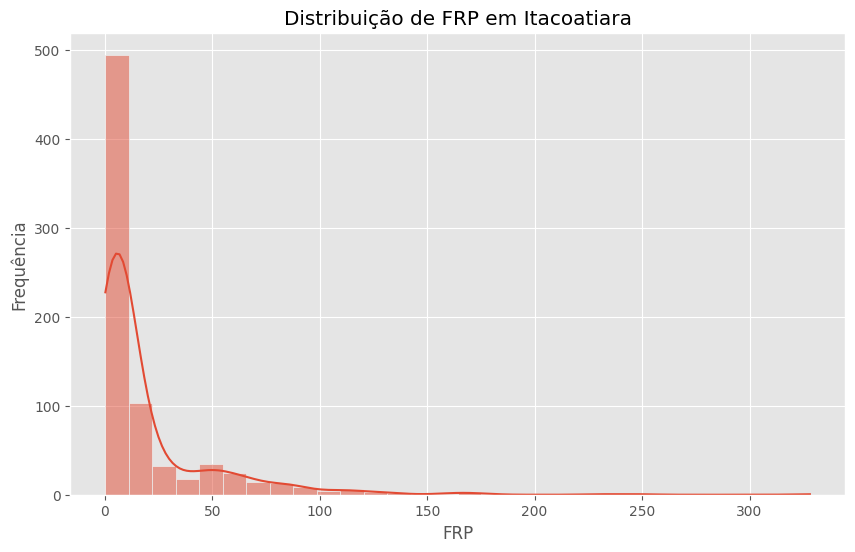

In [ ]:
# Histograma de FRP
plt.figure(figsize=(10, 6))
sns.histplot(Base_Dados_itacoatiara['FRP'], kde=True, bins=30)
plt.title('Distribuição de FRP em Itacoatiara')
plt.xlabel('FRP')
plt.ylabel('Frequência')
plt.show()


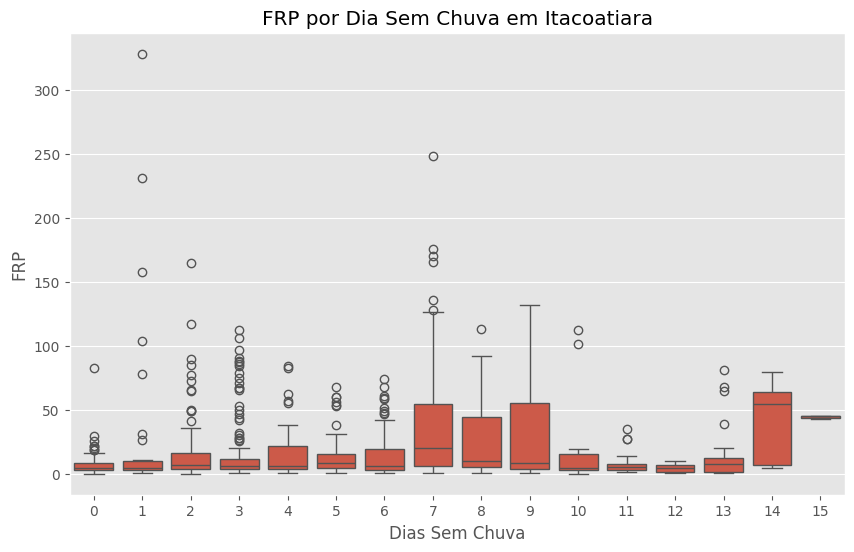

In [ ]:
# Boxplot de FRP por DiaSemChuva
plt.figure(figsize=(10, 6))
sns.boxplot(x='DiaSemChuva', y='FRP', data=Base_Dados_itacoatiara)
plt.title('FRP por Dia Sem Chuva em Itacoatiara')
plt.xlabel('Dias Sem Chuva')
plt.ylabel('FRP')
plt.show()


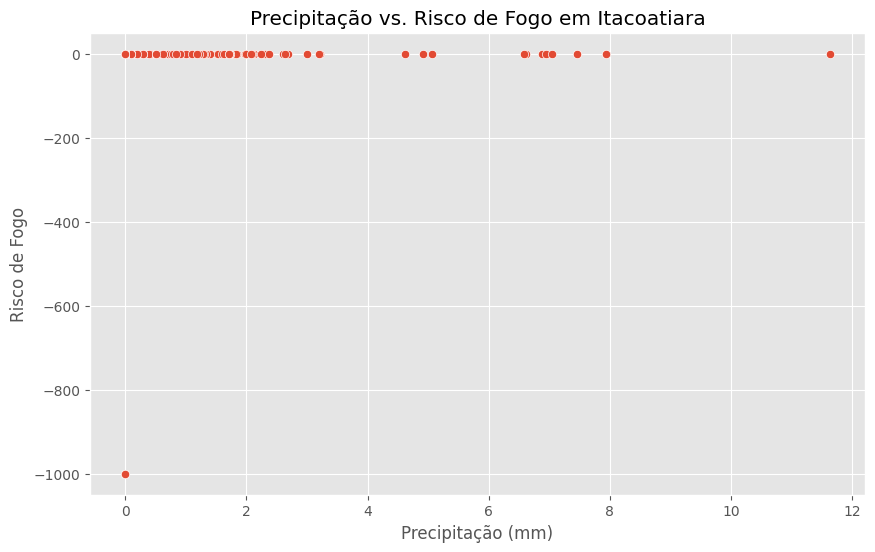

In [ ]:
# Gráfico de dispersão Precipitação vs. RiscoFogo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Precipitacao', y='RiscoFogo', data=Base_Dados_itacoatiara)
plt.title('Precipitação vs. Risco de Fogo em Itacoatiara')
plt.xlabel('Precipitação (mm)')
plt.ylabel('Risco de Fogo')
plt.show()


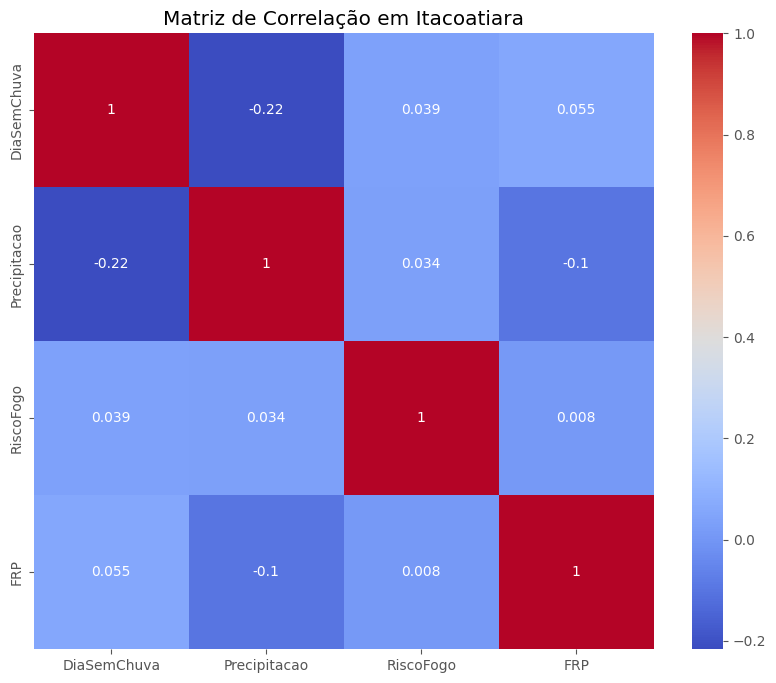

In [ ]:
# Matriz de correlação
plt.figure(figsize=(10, 8))
correlation_matrix = Base_Dados_itacoatiara[['DiaSemChuva', 'Precipitacao', 'RiscoFogo', 'FRP']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação em Itacoatiara')
plt.show()


In [ ]:
# Estatísticas descritivas por município
desc_stats = Base_Dados.groupby('Municipio')[['DiaSemChuva', 'Precipitacao', 'RiscoFogo', 'FRP']].describe()
print(desc_stats)

            DiaSemChuva                                                   \
                  count      mean       std  min   25%  50%    75%   max   
Municipio                                                                  
ALVARÃES         236.0  1.792373  1.553070  0.0  0.00  2.0   3.00   6.0   
AMATURÃ           44.0  1.204545  1.268208  0.0  0.00  1.0   3.00   3.0   
ANAMÃ            268.0  2.522388  1.594543  0.0  1.00  2.0   3.00   9.0   
ANORI             227.0  3.674009  1.682650  0.0  3.00  4.0   5.00   8.0   
APUÃ           12500.0  7.896800  3.982248  0.0  6.00  8.0  10.00  35.0   
...                 ...       ...       ...  ...   ...  ...    ...   ...   
TEFÃ             393.0  2.119593  1.831819  0.0  0.00  2.0   3.00   7.0   
TONANTINS          41.0  1.512195  1.343911  0.0  0.00  2.0   3.00   4.0   
UARINI            251.0  1.617530  1.672463  0.0  0.00  1.0   2.00   6.0   
URUCARÃ          104.0  3.836538  2.695233  0.0  1.75  4.0   6.00  10.0   
URUCURITUBA 

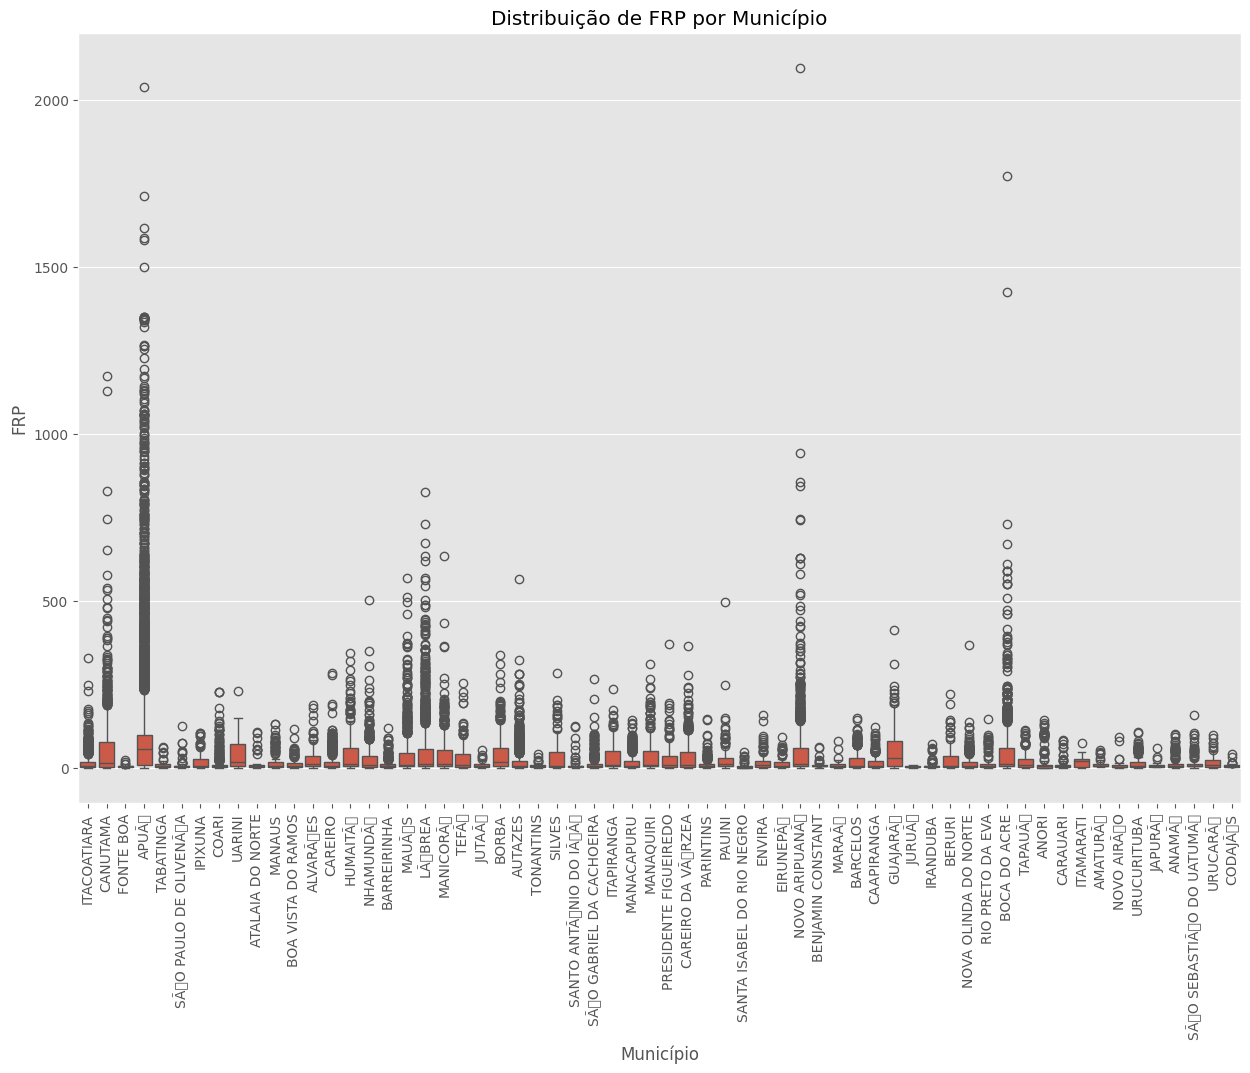

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Municipio', y='FRP', data=Base_Dados)
plt.title('Distribuição de FRP por Município')
plt.xlabel('Município')
plt.ylabel('FRP')
plt.xticks(rotation=90)
plt.show()


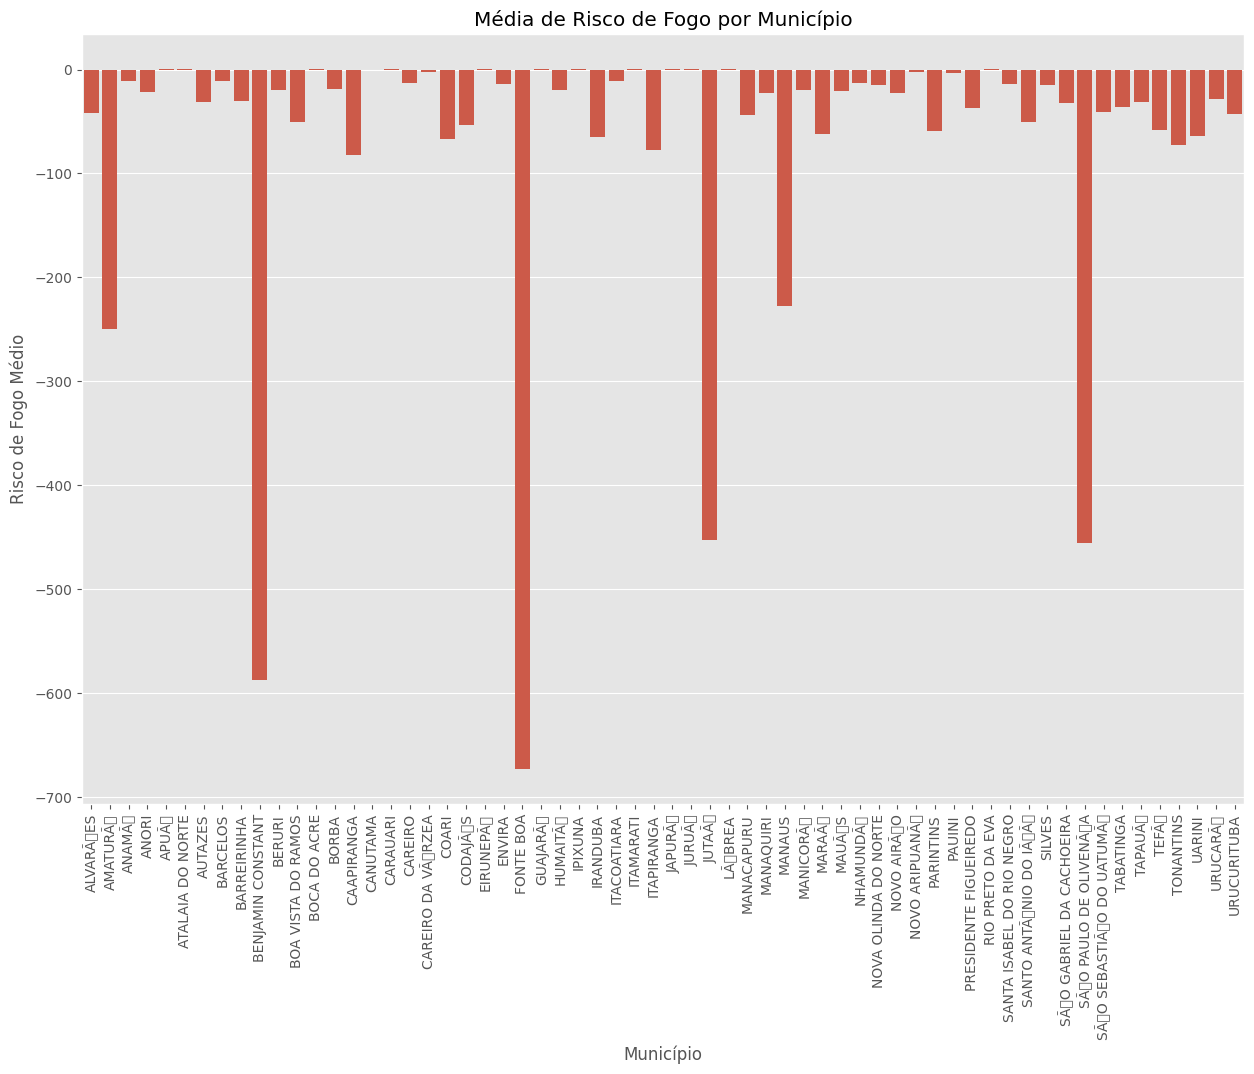

In [ ]:
# Média de Risco de Fogo por município
mean_risk = Base_Dados.groupby('Municipio')['RiscoFogo'].mean().reset_index()

plt.figure(figsize=(15, 10))
sns.barplot(x='Municipio', y='RiscoFogo', data=mean_risk)
plt.title('Média de Risco de Fogo por Município')
plt.xlabel('Município')
plt.ylabel('Risco de Fogo Médio')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Correlação entre variáveis por município
correlation_by_municipio = Base_Dados.groupby('Municipio')[['DiaSemChuva', 'Precipitacao', 'RiscoFogo', 'FRP']].corr()
print(correlation_by_municipio)


                          DiaSemChuva  Precipitacao  RiscoFogo       FRP
Municipio                                                               
ALVARÃES   DiaSemChuva      1.000000     -0.136463   0.080532 -0.159128
            Precipitacao    -0.136463      1.000000  -0.122208 -0.041603
            RiscoFogo        0.080532     -0.122208   1.000000  0.085401
            FRP             -0.159128     -0.041603   0.085401  1.000000
AMATURÃ    DiaSemChuva      1.000000      0.220800   0.177922  0.034309
...                               ...           ...        ...       ...
URUCARÃ    FRP             -0.080662     -0.189940  -0.002459  1.000000
URUCURITUBA DiaSemChuva      1.000000      0.053374  -0.301593  0.029575
            Precipitacao     0.053374      1.000000   0.078685  0.054429
            RiscoFogo       -0.301593      0.078685   1.000000  0.096932
            FRP              0.029575      0.054429   0.096932  1.000000

[248 rows x 4 columns]


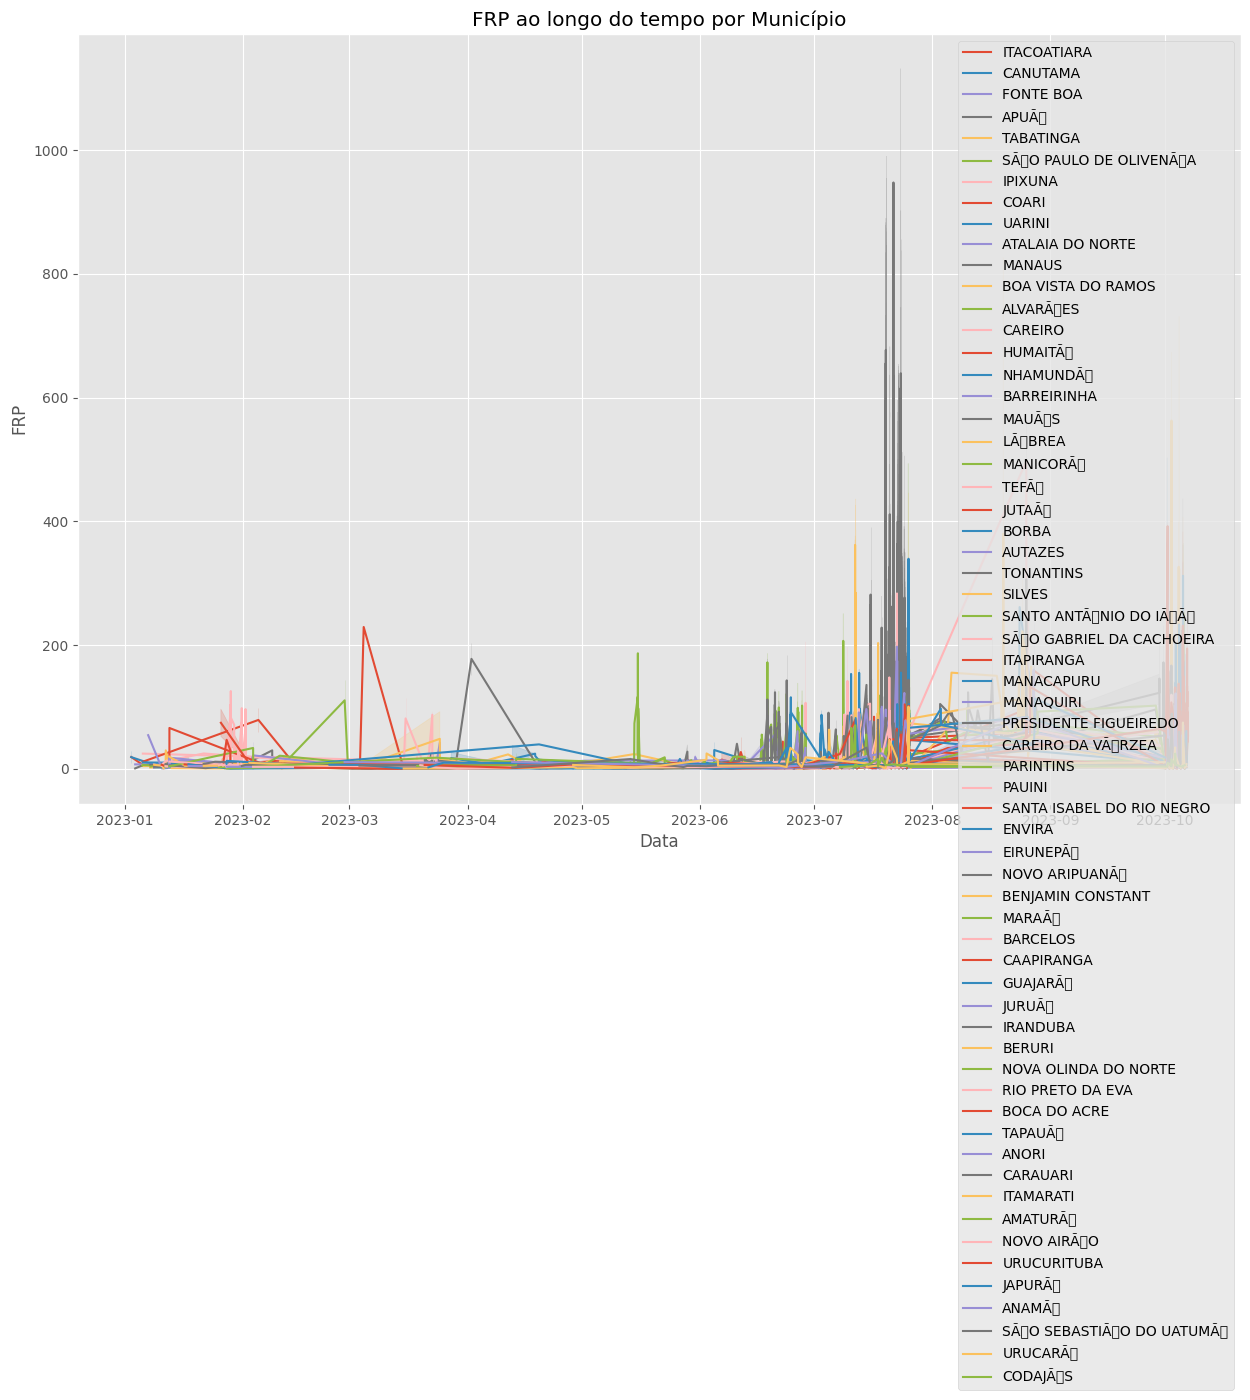

In [ ]:
# Converter a coluna DataHora para o tipo datetime
Base_Dados['DataHora'] = pd.to_datetime(Base_Dados['DataHora'])

# Plotar FRP ao longo do tempo para cada município
plt.figure(figsize=(15, 10))
for municipio in Base_Dados['Municipio'].unique():
    subset = Base_Dados[Base_Dados['Municipio'] == municipio]
    sns.lineplot(x='DataHora', y='FRP', data=subset, label=municipio)

plt.title('FRP ao longo do tempo por Município')
plt.xlabel('Data')
plt.ylabel('FRP')
plt.legend(loc='upper right')
plt.show()


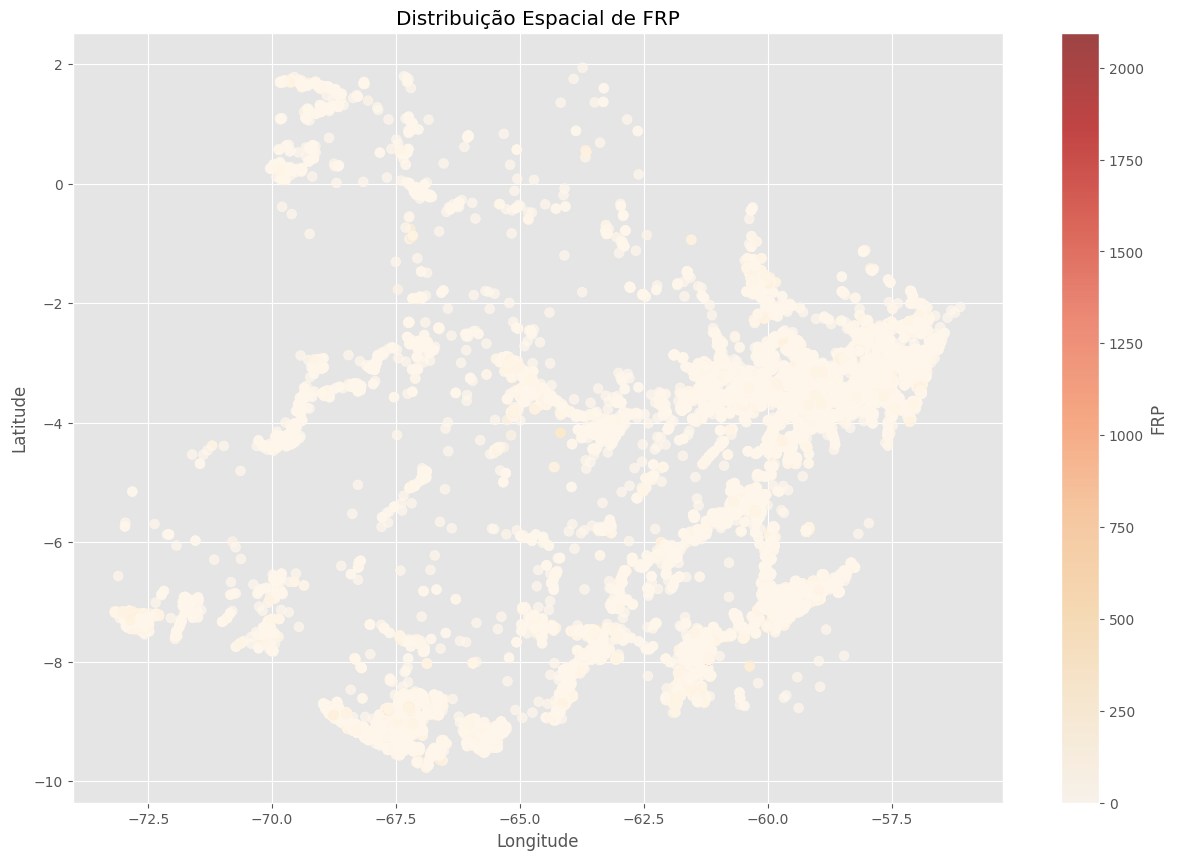

In [ ]:
# Gráfico de dispersão de latitude e longitude
plt.figure(figsize=(15, 10))
plt.scatter(Base_Dados['Longitude'], Base_Dados['Latitude'], c=Base_Dados['FRP'], cmap='OrRd', s=50, alpha=0.7)
plt.colorbar(label='FRP')
plt.title('Distribuição Espacial de FRP')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

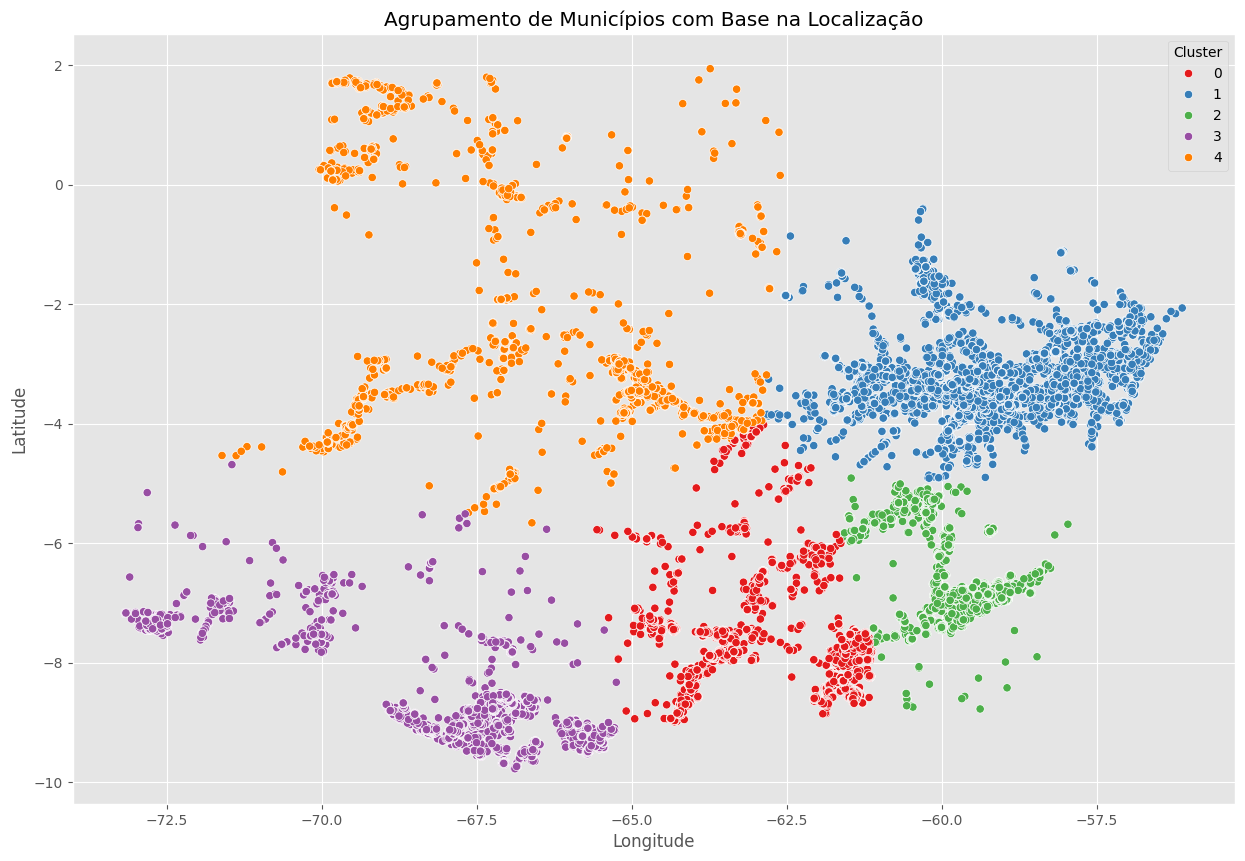

In [ ]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Imputar valores faltantes com a média
imputer = SimpleImputer(strategy='mean')
Base_Dados[['Latitude', 'Longitude']] = imputer.fit_transform(Base_Dados[['Latitude', 'Longitude']])

# Selecionar variáveis de interesse (Latitude e Longitude)
X = Base_Dados[['Latitude', 'Longitude']]

# Aplicar K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
Base_Dados['Cluster'] = kmeans.fit_predict(X)

# Visualizar clusters
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=Base_Dados, palette='Set1')
plt.title('Agrupamento de Municípios com Base na Localização')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
import folium

# Criar um mapa centrado na localização média dos dados
latitude_media = Base_Dados['Latitude'].mean()
longitude_media = Base_Dados['Longitude'].mean()

m = folium.Map(location=[latitude_media, longitude_media], zoom_start=6)

# Adicionar pontos ao mapa
for _, row in Base_Dados.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        popup=f"FRP: {row['FRP']}, RiscoFogo: {row['RiscoFogo']}",
        color='red' if row['FRP'] > 50 else 'blue',
        fill=True,
        fill_color='red' if row['FRP'] > 50 else 'blue'
    ).add_to(m)

# Mostrar o mapa
m.save("mapa_interativo.html")